# We will be using ARIMA model present in statsmodels package

# We will be performing it into two datasets of Nasdaq and DowJones and finally checking the accuracy of our model using mean_squared_error

In [2]:
#Importing all necessary packages 
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [38]:
# !pip install python-dateutil

In [10]:
#reading The csv file and making date as index
series =pd.read_csv('Nasdaq.csv', header=0, parse_dates=[0], index_col=0)
series1=pd.read_csv('DowJones.csv', header=0, parse_dates=[0], index_col=0)
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2083 entries, 1977-09-02 to 2017-08-29
Data columns (total 1 columns):
Value    2083 non-null float64
dtypes: float64(1)
memory usage: 32.5 KB


In [30]:
series1

,Value
Date,
1977-09-02,872.31
1977-09-09,857.04
1977-09-16,856.81
1977-09-23,839.14
1977-09-30,847.11
1977-10-07,840.35
1977-10-14,821.64
1977-10-21,808.30
1977-10-28,822.68


In [11]:
series1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2082 entries, 1977-09-02 to 2017-08-29
Data columns (total 1 columns):
Value    2082 non-null float64
dtypes: float64(1)
memory usage: 32.5 KB


In [12]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2083 entries, 1977-09-02 to 2017-08-29
Data columns (total 1 columns):
Value    2083 non-null float64
dtypes: float64(1)
memory usage: 32.5 KB


In [15]:
import numpy as np
df=np.asarray(series)
df1=np.asarray(series1)


# Calling ARIMA function by passing 3 variables in order argument(p,d,q)
# d=The value of d is the minimum number of differencing needed to make the series stationary. 
# And if the time series is already stationary, then d = 0.
# p=is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors.
# q=is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.
# further reference can be taken from---https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/---

In [16]:
model = ARIMA(df, order=(5,1,0))
model1=ARIMA(df1, order=(5,1,0))
model_fit = model.fit(disp=0)
model_fit1 = model1.fit(disp=0)

In [18]:
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2082
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -11709.015
Method:                       css-mle   S.D. of innovations             67.020
Date:                Thu, 19 Mar 2020   AIC                          23432.030
Time:                        12:52:58   BIC                          23471.518
Sample:                             1   HQIC                         23446.500
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9758      1.507      1.974      0.048       0.021       5.930
ar.L1.D.y     -0.0409      0.022     -1.865      0.062      -0.084       0.002
ar.L2.D.y      0.0252      0.022      1.153      0.2

In [19]:
print(model_fit1.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2081
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -13830.659
Method:                       css-mle   S.D. of innovations            186.273
Date:                Thu, 19 Mar 2020   AIC                          27675.319
Time:                        12:53:02   BIC                          27714.803
Sample:                             1   HQIC                         27689.787
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0963      3.663      2.757      0.006       2.918      17.275
ar.L1.D.y     -0.0775      0.022     -3.539      0.000      -0.120      -0.035
ar.L2.D.y      0.0522      0.022      2.375      0.0

In [38]:
X = series.values
#selecting size of train and test datapoints
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0)) #calling ARIMA method with p,d,q values in order
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #printing predicted and expected value
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=1975.775605, expected=2006.680000
predicted=2006.977379, expected=2086.920000
predicted=2087.096409, expected=2140.460000
predicted=2144.026616, expected=2123.870000
predicted=2129.869222, expected=2066.150000
predicted=2071.997906, expected=2064.010000
predicted=2067.323041, expected=2053.560000
predicted=2057.157853, expected=2037.930000
predicted=2037.385567, expected=2029.820000
predicted=2028.373810, expected=2047.630000
predicted=2047.606474, expected=1984.730000
predicted=1988.500761, expected=1940.470000
predicted=1939.655842, expected=1960.020000
predicted=1958.758020, expected=2057.170000
predicted=2055.072472, expected=2052.880000
predicted=2055.068590, expected=1995.740000
predicted=1997.274477, expected=2049.770000
predicted=2049.644726, expected=1920.150000
predicted=1932.913468, expected=1917.960000
predicted=1911.878505, expected=1904.250000
predicted=1905.200981, expected=1912.090000
predicted=1911.666196, expected=1986.740000
predicted=1980.211515, expected=

In [31]:
X1 = series1.values
#Selecting size of train and test datapoints
size = int(len(X1) * 0.66)
train, test = X1[0:size], X1[size:len(X1)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0)) #calling ARIMA method with p,d,q values in order
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=10327.856586, expected=10409.850000
predicted=10398.560425, expected=10458.890000
predicted=10439.470769, expected=10600.510000
predicted=10577.770784, expected=10568.290000
predicted=10580.592421, expected=10488.070000
predicted=10493.489568, expected=10593.030000
predicted=10573.490776, expected=10627.850000
predicted=10628.610547, expected=10619.030000
predicted=10639.032838, expected=10583.920000
predicted=10595.787004, expected=10595.550000
predicted=10589.548724, expected=10240.080000
predicted=10278.713015, expected=10186.600000
predicted=10178.970085, expected=10212.970000
predicted=10212.012774, expected=10470.590000
predicted=10475.985755, expected=10451.970000
predicted=10511.400078, expected=10472.840000
predicted=10483.434862, expected=10225.570000
predicted=10239.984364, expected=10117.340000
predicted=10098.989804, expected=10012.870000
predicted=10021.237499, expected=9966.740000
predicted=9983.686872, expected=10188.450000
predicted=10199.977186, expected=102

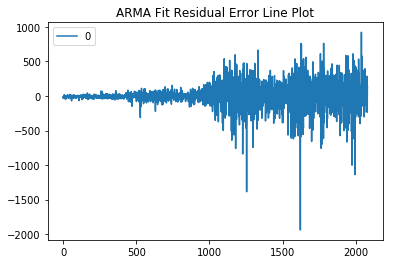

In [32]:
# plot residual errors for 'Nasdaq.csv' dataset found by ARIMA
#model_fit.resid gives residuals for 'Nasdaq.csv' dataset ARIMA model
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARMA Fit Residual Error Line Plot')
plt.show()

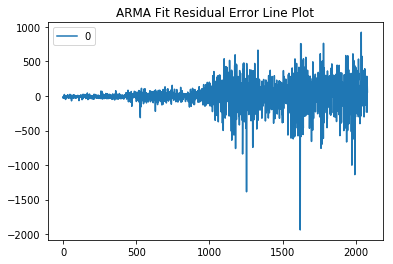

In [33]:
# plot residual errors for 'DowJones.csv' dataset found by ARIMA
#model_fit.resid gives residuals for 'DowJones.csv' dataset ARIMA model
residuals1 = pd.DataFrame(model_fit1.resid)
residuals1.plot()
plt.title('ARMA Fit Residual Error Line Plot')
plt.show()

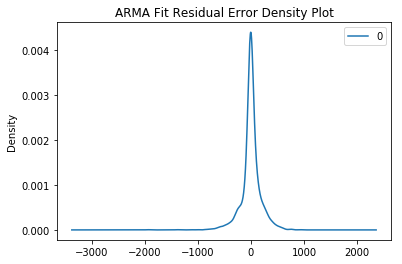

In [34]:
# plot residual errors for 'Nasdaq.csv' dataset found by ARIMA
#kind='kde' for density plot
residuals.plot(kind='kde')
plt.title('ARMA Fit Residual Error Density Plot')
plt.show()

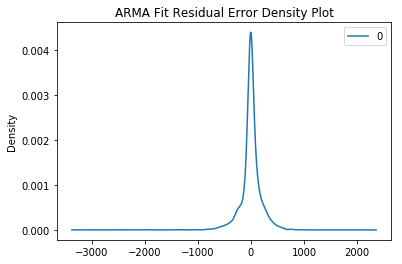

In [35]:
# plot Error Density for 'DowJones.csv' dataset found by ARIMA
#kind='kde' for density plot
residuals1.plot(kind='kde')
plt.title('ARMA Fit Residual Error Density Plot')
plt.show()

In [39]:
print(residuals.describe())

                 0
count  2080.000000
mean     -0.003655
std     186.358677
min   -1939.970568
25%     -47.591932
50%      -1.633235
75%      62.590640
max     923.330336


In [40]:
print(residuals1.describe())

                 0
count  2081.000000
mean     -0.003451
std     186.318237
min   -1939.922787
25%     -47.636102
50%      -1.669250
75%      62.334708
max     923.377100
